In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
dataset = pd.read_csv('data/featv2_ANSI.csv')

In [27]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,Class
0,0.862178,0.839308,0.784739,0.874484,0.801640,0.824449,0.823280,0.761248,0.835101,0.759689,...,0.703386,0.770972,0.864313,0.757855,0.822150,0.826606,0.803982,0.754933,0.887595,0
1,0.888839,0.825846,0.789228,0.872175,0.764380,0.907626,0.844091,0.827957,0.855548,0.712574,...,0.706060,0.793318,0.845691,0.907800,0.779318,0.901443,0.842881,0.920459,0.867823,1
2,0.863721,0.761275,0.742764,0.711046,0.848023,0.894249,0.962257,0.758384,0.819211,0.757989,...,0.782618,0.730807,0.777283,0.838118,0.934164,0.765030,0.840798,0.787319,0.751451,1
3,0.915312,0.865700,0.803962,0.780047,0.814519,0.810747,0.870463,0.927868,0.827903,0.790925,...,0.696763,0.759936,0.811648,0.798482,0.729883,0.774720,0.811142,0.691062,0.738499,1
4,0.848264,0.728891,0.748240,0.850766,0.746471,0.801984,0.765300,0.806117,0.766603,0.881900,...,0.781184,0.842300,0.769603,0.865306,0.823036,0.942358,0.743737,0.729783,0.820932,1


In [28]:
X = dataset.drop(columns=['Class'])
y = dataset['Class']

In [17]:
def classifier_test(clf, X, y, prms=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    if not prms:
        score = np.mean(cross_val_score(clf, X_train, y_train, cv=10))
        print('Acurácia:', score)
        
    else:
        clf = GridSearchCV(clf, prms)
        clf.fit(X_train, y_train)

        print('Melhor acurácia cross validation:', clf.best_score_) 
        print('Melhor classificador:', clf.best_estimator_) 


        y_pred = clf.best_estimator_.predict(X_test)
        print('Acurácia train test split:', sum(y_pred == y_test)/len(y_pred))


        #df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
        sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d")

In [29]:
classifier_test(GaussianNB(), X, y)

Acurácia: 0.4003890997492364


In [ ]:
classifier_test(KNeighborsClassifier(), X, y, {
    'n_neighbors': np.arange(1, 50), 
    'weights': ['uniform', 'distance']
})

Melhor acurácia cross validation: 0.9919354838709677
Melhor classificador: MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=40, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Acurácia train test split: 0.9629629629629629


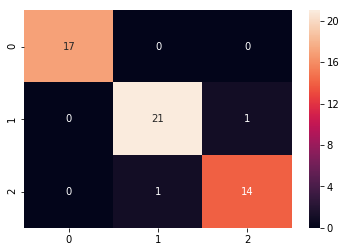

In [56]:
classifier_test(MLPClassifier(), X, y, {
    'hidden_layer_sizes': np.arange(5, 101, 5), 
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [1e-5, 0.001, 0.01]
})

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(C=0.15)

In [ ]:
score = np.mean(cross_val_score(linear_svm, X, y, cv=10))

In [ ]:
score

In [20]:
classifier_test(SVC(), X, y, [
    {'kernel': ['rbf'], 'C': np.linspace(1e-16, 20, 5000), 'gamma': [1e-2, 1e-3, 1e-4]},
    {'kernel': ['linear'], 'C': np.linspace(1e-16, 20, 5000)}
])

KeyboardInterrupt: 

Melhor acurácia cross validation: 0.9758064516129032
Melhor classificador: BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=12, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
Acurácia train test split: 0.9629629629629629


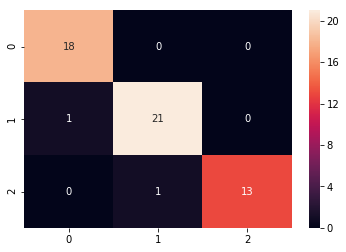

In [59]:
classifier_test(BaggingClassifier(), X, y, [
    {'base_estimator': [DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=3), GaussianNB()],
     'n_estimators': np.arange(1, 100)}
])

Melhor acurácia cross validation: 0.9838709677419355
Melhor classificador: AdaBoostClassifier(algorithm='SAMME', base_estimator=GaussianNB(priors=None),
          learning_rate=0.9, n_estimators=5, random_state=None)
Acurácia train test split: 0.9814814814814815


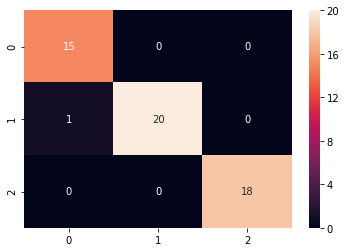

In [60]:
classifier_test(AdaBoostClassifier(), X, y, [
    {'base_estimator': [DecisionTreeClassifier(), GaussianNB()],
     'n_estimators': np.arange(1, 100),
     'learning_rate': np.arange(0.1, 1.01, 0.1),
     'algorithm': ['SAMME', 'SAMME.R']}
])

Melhor acurácia cross validation: 0.9838709677419355
Melhor classificador: BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.2,
         max_samples=1.0, n_estimators=44, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
Acurácia train test split: 0.9629629629629629


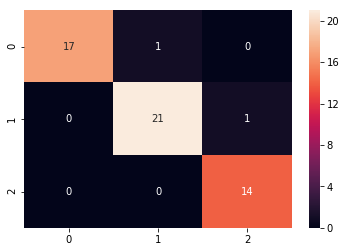

In [61]:
classifier_test(BaggingClassifier(), X, y, [
    {'base_estimator': [DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=3), GaussianNB()],
     'n_estimators': np.arange(1, 100),
     'max_features': np.arange(0.1, 1.0, 0.1)}
])

In [62]:
classifier_test(RandomForestClassifier(), X, y, [
    {'n_estimators': np.arange(1, 100),
     'criterion': ['gini', 'entropy'],
     'max_depth': np.arange(1, 100)}
])

KeyboardInterrupt: 